In [17]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path


In [18]:
img_dir = Path("../../data/images")


# Faltungsoperatoren

Bitte experimentieren Sie mit den folgenden Faltungsfiltern und achten Sie auf den Einfluss des Strukturelements, dessen Größe und Inhalt.


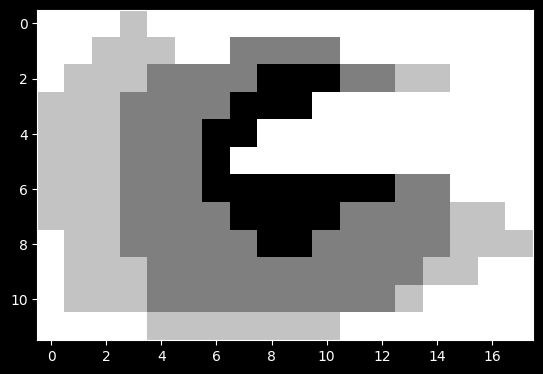

In [19]:
img = cv.imread(str(img_dir / "raw_gray.png"), cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

## Mittelwertfilter


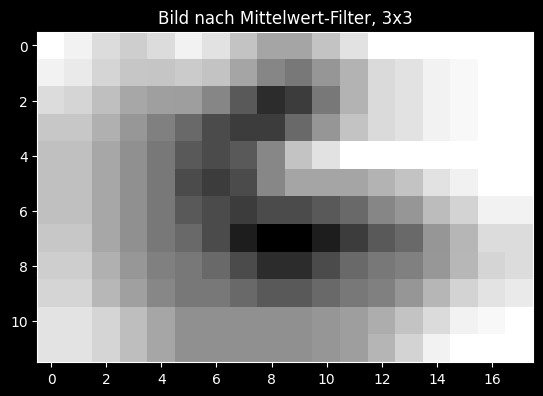

In [20]:
# Der Aufbau der Faltungsoperation mit OpenCV gestaltet sich im Folgenden immer gleich:
# 1. definiere dene Faltungskernel
kernel = np.ones((3, 3), np.float32) / 9
# 2. wende Faltungskernel an (Syntax: filter2D(src, ddepth, kernel))
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Mittelwert-Filter, 3x3")
plt.show()

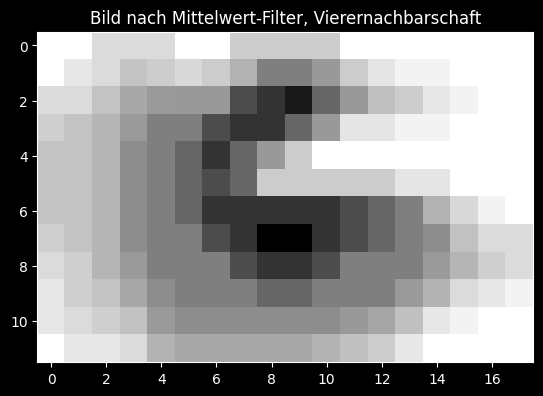

In [21]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.float32) / 5
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Mittelwert-Filter, Vierernachbarschaft")
plt.show()

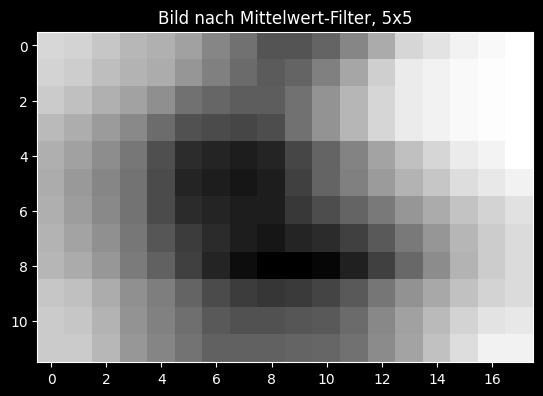

In [22]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Mittelwert-Filter, 5x5")
plt.show()

## Gaußscher Glättungsfilter


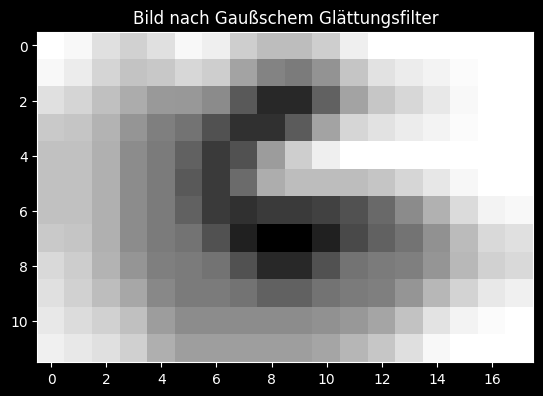

In [23]:
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Gaußschem Glättungsfilter")
plt.show()

## Schärfungsfilter


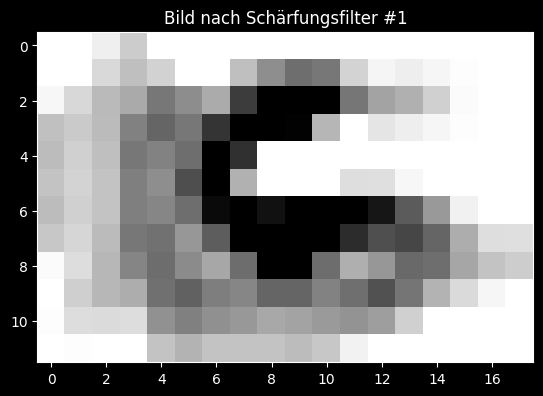

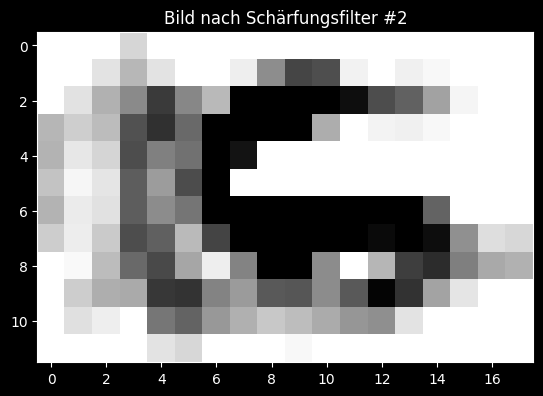

In [24]:
kernel1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
sharp1 = cv.filter2D(dst, -1, kernel1)
plt.imshow(sharp1, cmap="gray")
plt.title("Bild nach Schärfungsfilter #1")
plt.show()

kernel2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], np.float32)
sharp2 = cv.filter2D(dst, -1, kernel2)
plt.imshow(sharp2, cmap="gray")
plt.title("Bild nach Schärfungsfilter #2")
plt.show()

## Laplace Kantenfilter


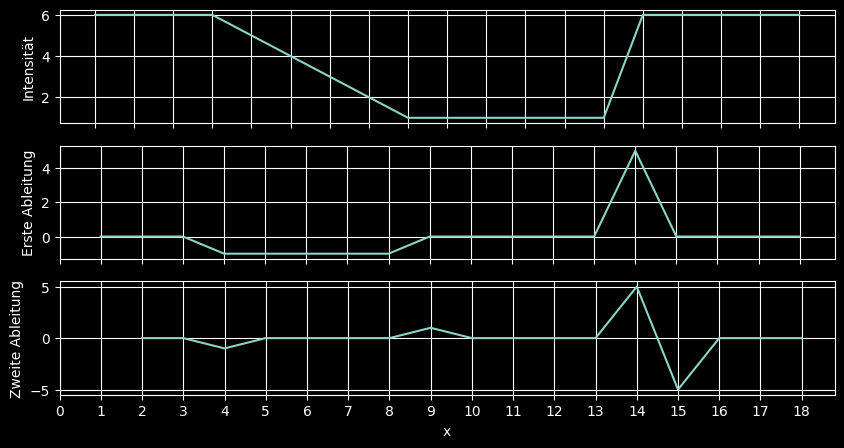

In [25]:
# Beispiel zur Illustration von Laplace-Kantenfiltern
y = np.array([6, 6, 6, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6])
x = np.arange(0, y.size)
y_d = np.diff(y)  # 1. Ableitung
y_dd = np.diff(y_d)  # 2. Ableitung

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.xticks(x)
plt.ylabel("Intensität")
plt.setp(ax1.get_xticklabels(), visible=False)
plt.grid(True)

ax2 = plt.subplot(3, 1, 2)
plt.plot(x[1:], y_d)
plt.xticks(x)
plt.ylabel("Erste Ableitung")
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid(True)

ax3 = plt.subplot(3, 1, 3)
plt.plot(x[2:], y_dd)
plt.xticks(x)
plt.ylabel("Zweite Ableitung")
plt.xlabel("x")
ax3 = plt.setp(ax3.get_xticklabels(), visible=True)
plt.grid(True)

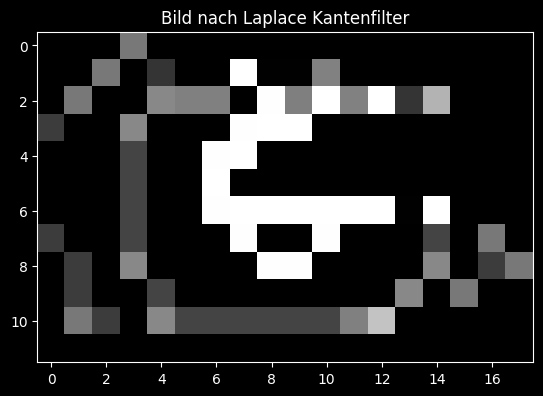

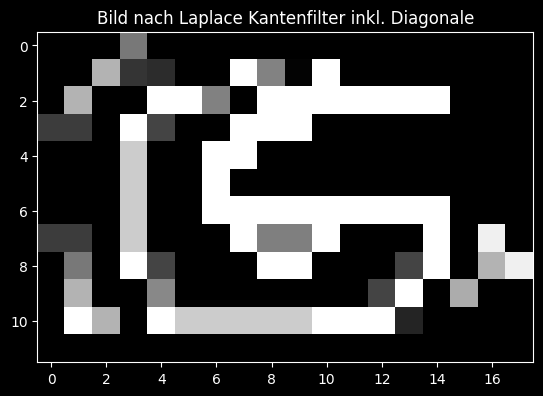

In [26]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Laplace Kantenfilter")
plt.show()

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Laplace Kantenfilter inkl. Diagonale")
plt.show()

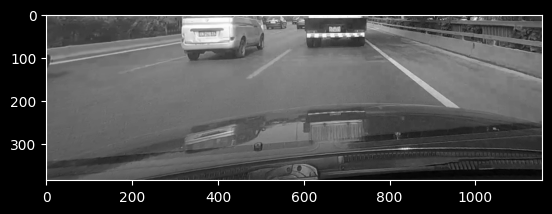

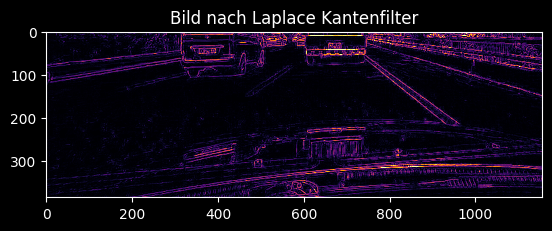

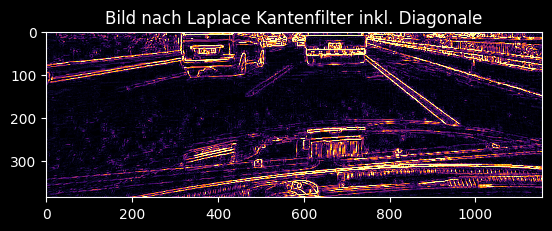

In [27]:
img_lanes = cv.imread(str(img_dir / "uclanes_ex.jpg"), cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap="gray")
plt.show()

kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=50)  # ACHTUNG: hier wurde der Anzeigeraum zur Visualisierung angepasst
plt.title("Bild nach Laplace Kantenfilter")
plt.show()

kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=50)
plt.title("Bild nach Laplace Kantenfilter inkl. Diagonale")
plt.show()

## Sobel Kantenfilter


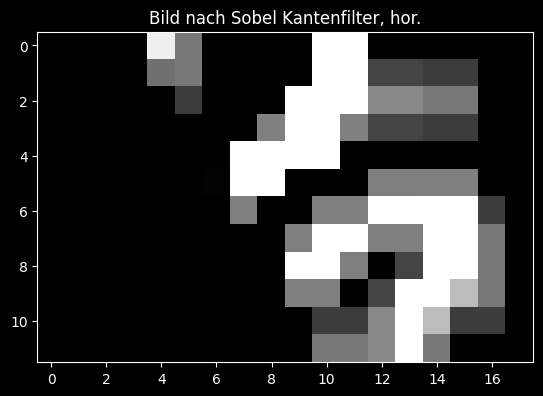

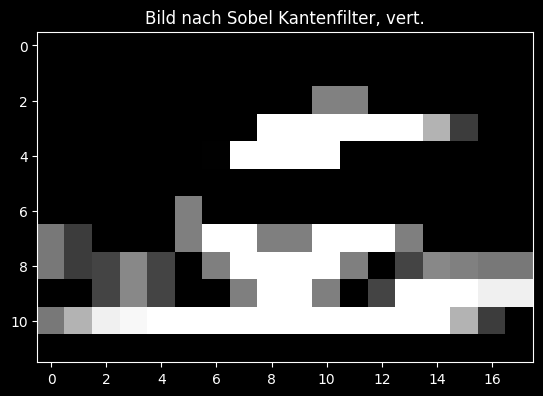

In [28]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Sobel Kantenfilter, hor.")
plt.show()

kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dst = cv.filter2D(img, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.title("Bild nach Sobel Kantenfilter, vert.")
plt.show()

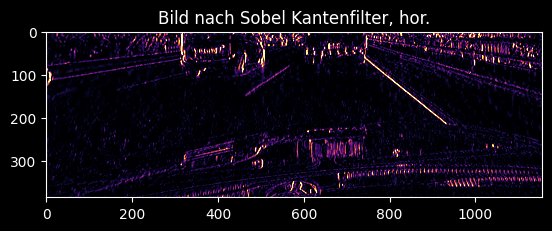

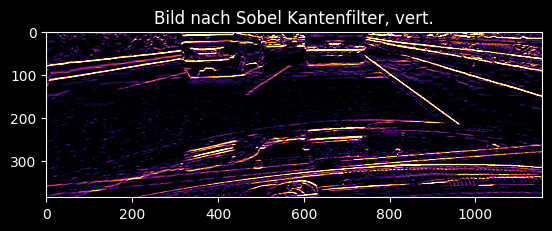

In [29]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=100)
plt.title("Bild nach Sobel Kantenfilter, hor.")
plt.show()

kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=100)
plt.title("Bild nach Sobel Kantenfilter, vert.")
plt.show()

## Prewitt Kantenfilter


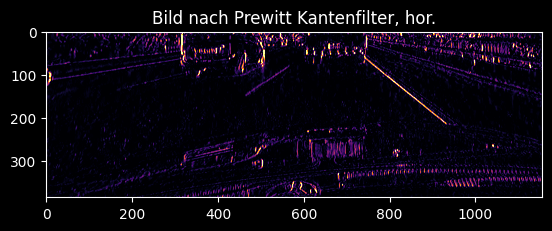

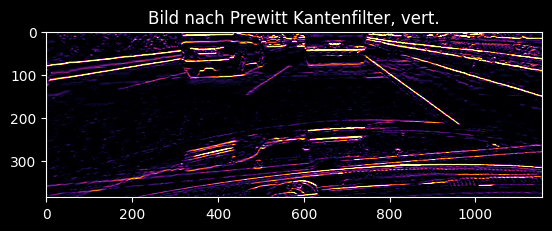

In [30]:
kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=100)
plt.title("Bild nach Prewitt Kantenfilter, hor.")
plt.show()

kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=100)
plt.title("Bild nach Prewitt Kantenfilter, vert.")
plt.show()

## Simpler Kantenfilter


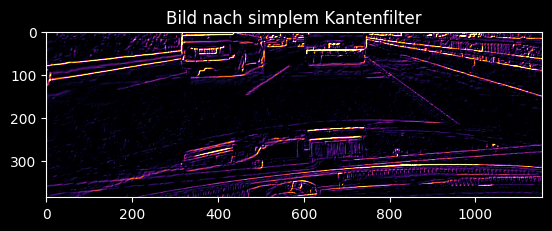

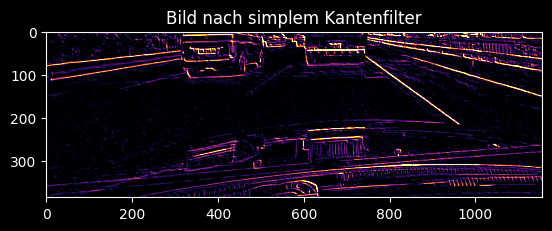

In [31]:
kernel = np.array([[-1, 0, 0], [0, 0, 0], [0, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=50)
plt.title("Bild nach simplem Kantenfilter")
plt.show()

kernel = np.array([[0, 0, -1], [0, 0, 0], [1, 0, 0]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=50)
plt.title("Bild nach simplem Kantenfilter")
plt.show()

## Relieffilter


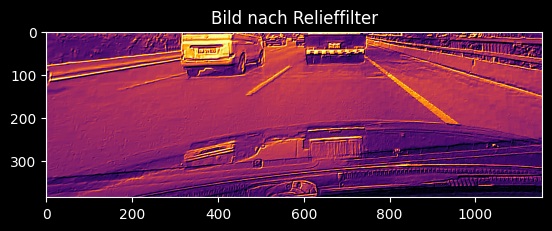

In [32]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno")
plt.title("Bild nach Relieffilter")
plt.show()

# Aufgaben

1. Welchen Einfluss hat die Filtergröße auf die Faltung?
2. Welchen Einfluss hat der gewählte Ursprung des Filterelements?
3. Wie können Sie die Faltungsoperatoren für die Spurerkennung nutzen? Wenden Sie diese an.


In [33]:
# Ein größerer Filter benötigt mehr Padding und führt zu einem verschwommeneren Resultat
# Es macht einen Unterschied, abhängig vom gewählten Ankerpunkt/Ursprung wird es zu unterschiedlichen Ergebnissen kommen und Pixel werden eventuell nicht genutzt
# Es lassen sich Faltungsfilter wie der Sobel Kantenfilter nutzen, durch welchen die Spuren klar erkennbar sind


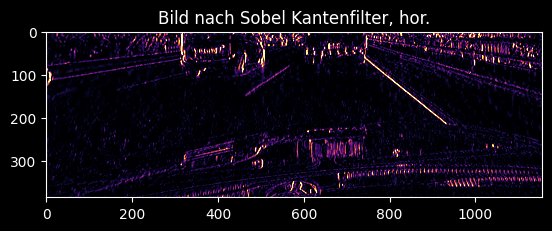

In [34]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dst = cv.filter2D(img_lanes, -1, kernel)
plt.imshow(dst, cmap="inferno", vmin=0, vmax=100)
plt.title("Bild nach Sobel Kantenfilter, hor.")
plt.show()